<a href="https://colab.research.google.com/github/raisaurabh44/Netflix_Shares_Price_Prediction_Linear_Regression/blob/main/Netflix_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Netflix_Stock_Prediction_Time_Series/NFLX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900
...,...,...,...,...,...,...,...
3545,2024-02-05,562.469971,575.750000,557.200012,562.059998,562.059998,4143100
3546,2024-02-06,564.119995,566.340027,554.369995,555.880005,555.880005,2840300
3547,2024-02-07,558.159973,567.799988,554.979980,559.299988,559.299988,4373600
3548,2024-02-08,560.549988,563.700012,555.739990,558.530029,558.530029,3175500


Describing The Data Set and cleaning ,EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3550 non-null   object 
 1   Open       3550 non-null   float64
 2   High       3550 non-null   float64
 3   Low        3550 non-null   float64
 4   Close      3550 non-null   float64
 5   Adj Close  3550 non-null   float64
 6   Volume     3550 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 194.3+ KB


In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900
5,2010-01-11,7.660000,7.704286,7.528571,7.604286,7.604286,6783700
6,2010-01-12,7.528571,7.582857,7.451429,7.481429,7.481429,6330100
7,2010-01-13,7.612857,7.754286,7.558571,7.708571,7.708571,14422100
8,2010-01-14,7.518571,7.575714,7.270000,7.284286,7.284286,17685500
9,2010-01-15,7.245714,7.407143,7.232857,7.278571,7.278571,13031200


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3545,2024-02-05,562.469971,575.750000,557.200012,562.059998,562.059998,4143100
3546,2024-02-06,564.119995,566.340027,554.369995,555.880005,555.880005,2840300
3547,2024-02-07,558.159973,567.799988,554.979980,559.299988,559.299988,4373600
3548,2024-02-08,560.549988,563.700012,555.739990,558.530029,558.530029,3175500
3549,2024-02-09,565.000000,566.000000,558.099976,561.320007,561.320007,3051600


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3550.00,3550.00,3550.00,3550.00,3550.00,3550.00
mean,205.09,208.24,201.85,205.12,205.12,17468659.01
std,182.17,184.69,179.49,182.11,182.11,20015759.80
min,6.96,7.18,6.93,7.02,7.02,1144000.00
25%,37.86,38.39,37.38,38.01,38.01,5831800.00
50%,139.00,140.71,137.49,138.51,138.51,10980850.00
75%,353.97,359.87,348.32,354.29,354.29,21745750.00
max,692.35,700.99,686.09,691.69,691.69,315541800.00


In [ ]:
df.shape

(3550, 7)

In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3550 non-null   datetime64[ns]
 1   Open       3550 non-null   float64       
 2   High       3550 non-null   float64       
 3   Low        3550 non-null   float64       
 4   Close      3550 non-null   float64       
 5   Adj Close  3550 non-null   float64       
 6   Volume     3550 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 194.3 KB


Data Cleaning

In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.duplicated().sum()
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Time Series Visualization

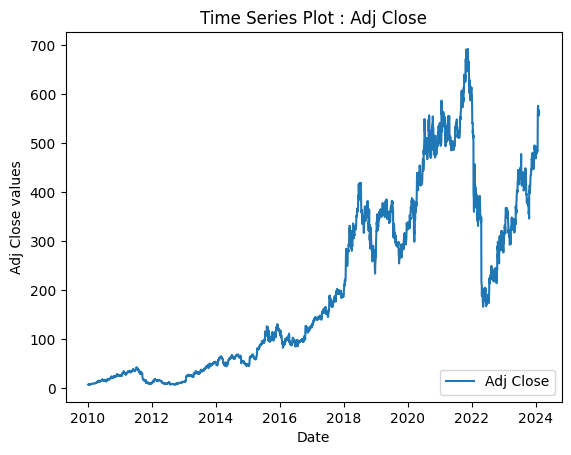

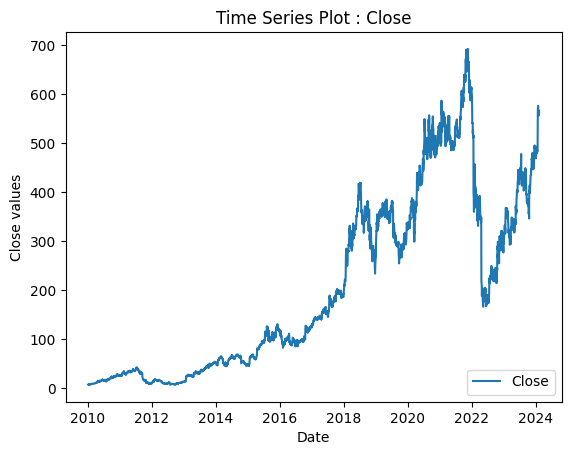

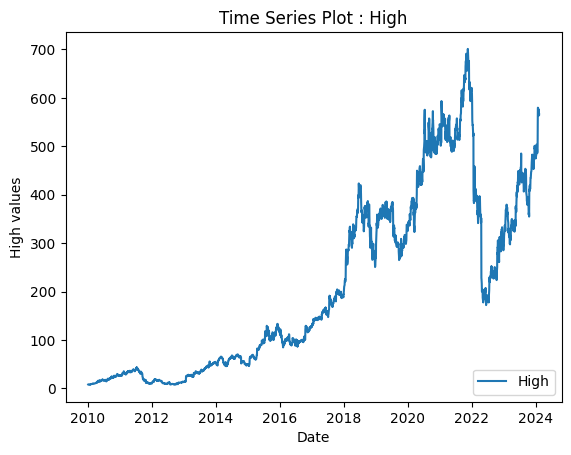

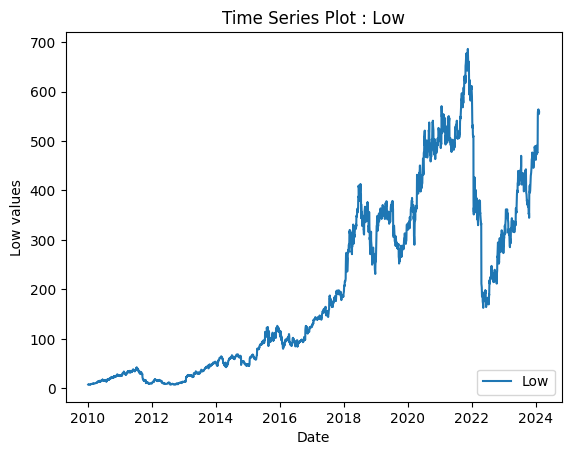

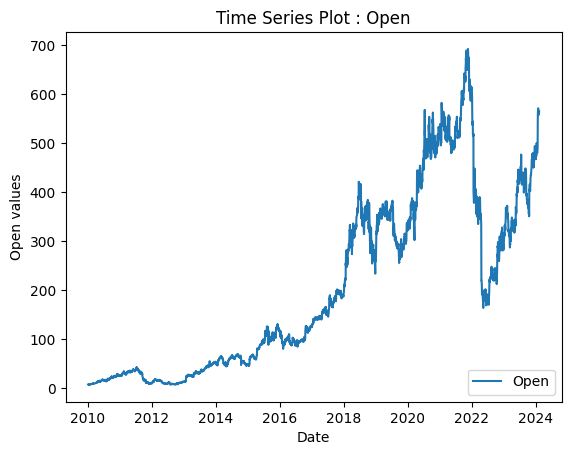

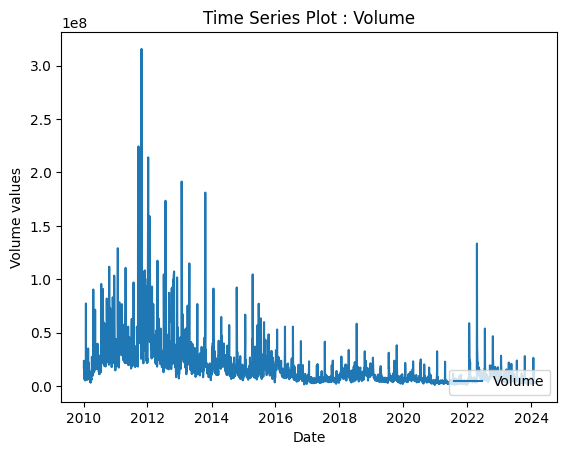

In [ ]:
import matplotlib.pyplot as plt
def time_series(df):
  x = df['Date']
  column_names = df.columns.difference(['Date'])
  for y in column_names:
    plt.plot(x, df[y], label=y)
    plt.xlabel('Date')
    plt.ylabel(y + ' values')
    plt.title('Time Series Plot : ' + y )
    plt.legend(loc='lower right')
    plt.show()
time_series(df)

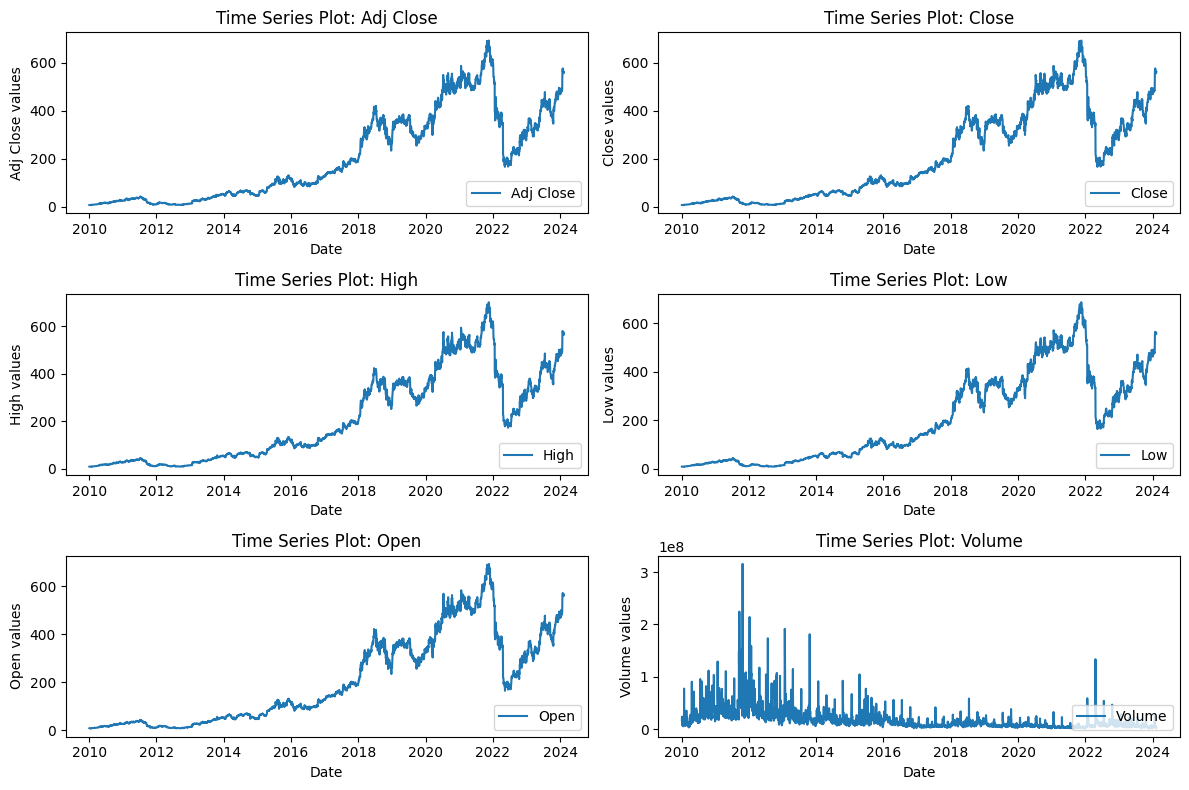

In [ ]:
import matplotlib.pyplot as plt
def time_series(df):
    x = df['Date']
    column_names = df.columns.difference(['Date'])
    # Create a 3x2 grid of subplots
    fig, axs = plt.subplots(3, 2, figsize=(12, 8))
    # Flatten the 2D array of Axes objects for easier iteration
    axs = axs.flatten()
    # Loop through each subplot and plot the time series for each column
    for i, y in enumerate(column_names):
        axs[i].plot(x, df[y], label=y)
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel(y + ' values')
        axs[i].set_title('Time Series Plot: ' + y)
        axs[i].legend(loc='lower right')
    # Adjust layout for better spacing
    plt.tight_layout()
    # Show the plots
    plt.show()
# Assuming df is your DataFrame
time_series(df)

In [ ]:
def descriptiv_stats(df):
  open_stats=df['Open'].describe()
  close_stats=df['Close'].describe()
  return open_stats, close_stats

open_stats, close_stats= descriptiv_stats(df)
print('Descriptive Statistics for Open column','\n', open_stats,'\n')
print('Descriptive Statistics for Close column','\n', close_stats,'\n')

Descriptive Statistics for Open column 
 count   3550.00
mean     205.09
std      182.17
min        6.96
25%       37.86
50%      139.00
75%      353.97
max      692.35
Name: Open, dtype: float64 

Descriptive Statistics for Close column 
 count   3550.00
mean     205.12
std      182.11
min        7.02
25%       38.01
50%      138.51
75%      354.29
max      691.69
Name: Close, dtype: float64 



In [ ]:
def corr(df):
  column=['Open','High','Low','Close','Adj Close']
  correlation= df[column].corr()
  return correlation

print('Corelation Matrix : ')
corr(df)

Corelation Matrix : 


,Open,High,Low,Close,Adj Close
Open,1.00,1.00,1.00,1.00,1.00
High,1.00,1.00,1.00,1.00,1.00
Low,1.00,1.00,1.00,1.00,1.00
Close,1.00,1.00,1.00,1.00,1.00
Adj Close,1.00,1.00,1.00,1.00,1.00


In [ ]:
min_close=df.loc[df['Close'].idxmin()]
min_volume=df.loc[df['Volume'].idxmin()]
max_close=df.loc[df['Close'].idxmax()]
max_volume=df.loc[df['Volume'].idxmax()]
print('Minimum closing price date is : ', min_close['Date'], ' Price is : ', min_close['Close'])
print('Minimum Volume date is : ', min_volume['Date'], ' Volume is : ', min_volume['Volume'])
print('Maximum closing price date is : ', max_close['Date'], ' Price is : ', max_close['Close'])
print('Maximum volume date is : ', max_volume['Date'], ' Volume is : ', max_volume['Volume'])

Minimum closing price date is :  2010-01-25 00:00:00  Price is :  7.018571
Minimum Volume date is :  2020-12-24 00:00:00  Volume is :  1144000
Maximum closing price date is :  2021-11-17 00:00:00  Price is :  691.690002
Maximum volume date is :  2011-10-25 00:00:00  Volume is :  315541800


In [ ]:
no_year = df['Date'].dt.year.unique()
no_year

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024])

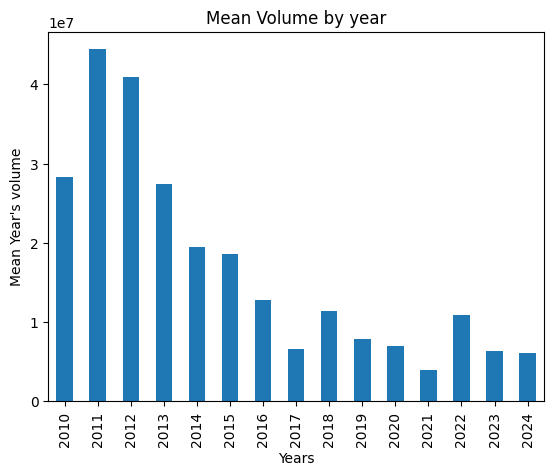

In [ ]:
no_year = df['Date'].dt.year.unique()
yearly_data= df.groupby(df['Date'].dt.year)['Volume'].mean()
yearly_data.plot(kind='bar',
                 xlabel='Years',
                 ylabel="Mean Year's volume",
                 title='Mean Volume by year')
#addlabels(df['Volume'].mean(), yearly_data)
plt.xticks(range(0,15))
plt.show()

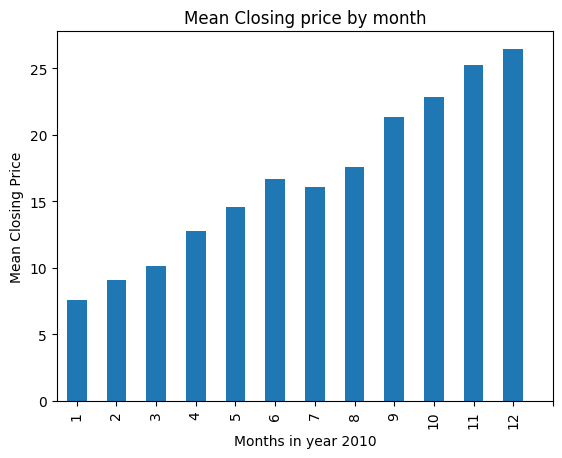

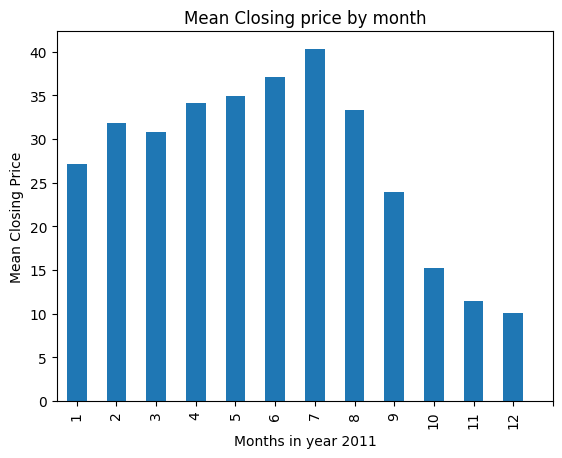

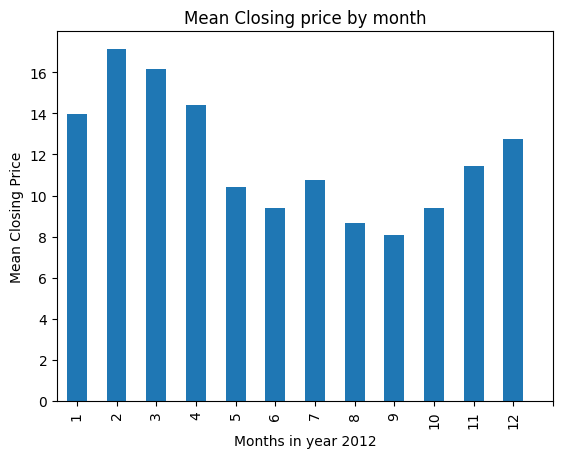

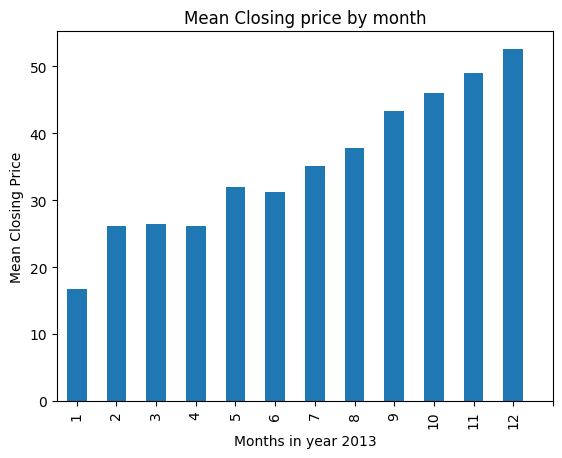

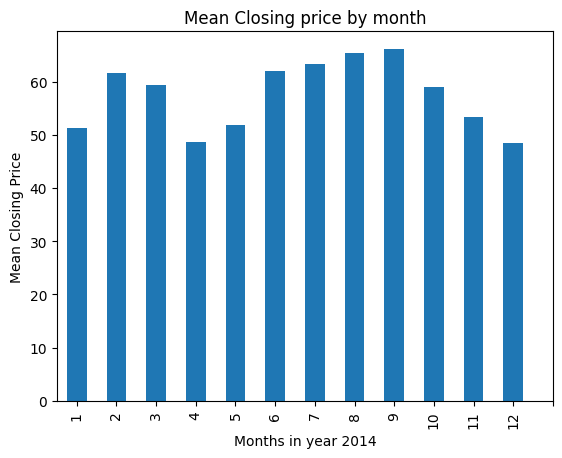

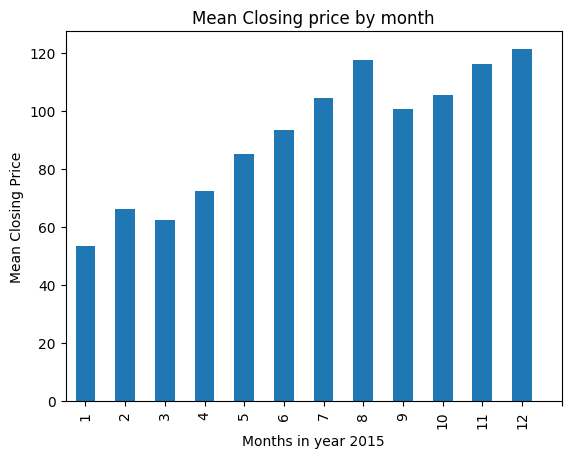

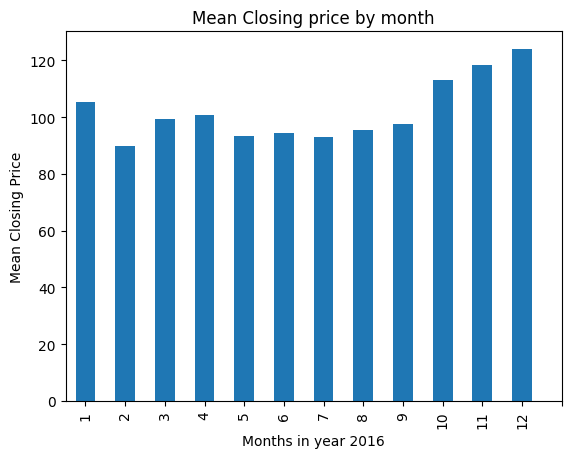

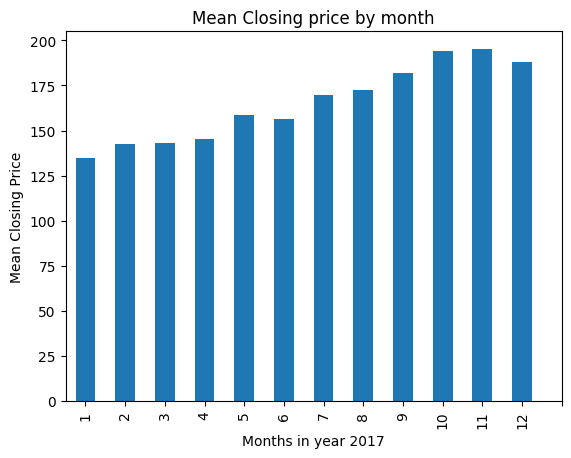

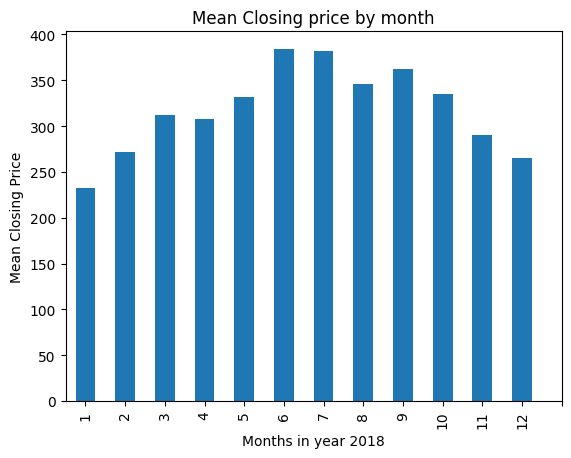

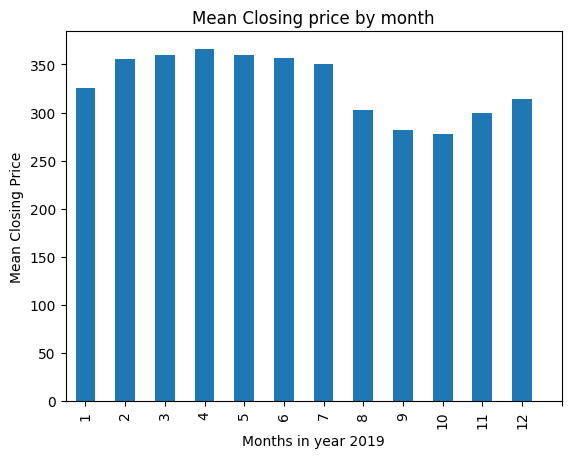

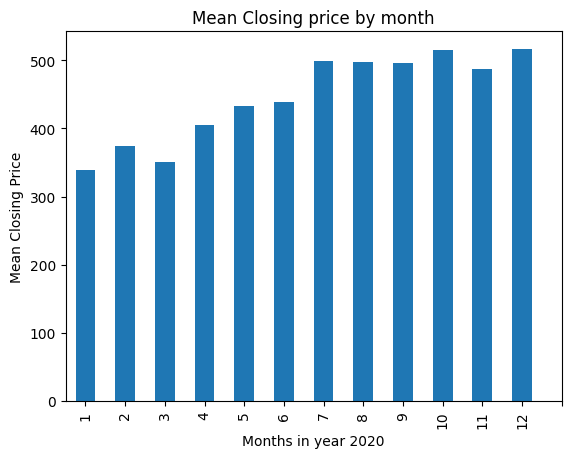

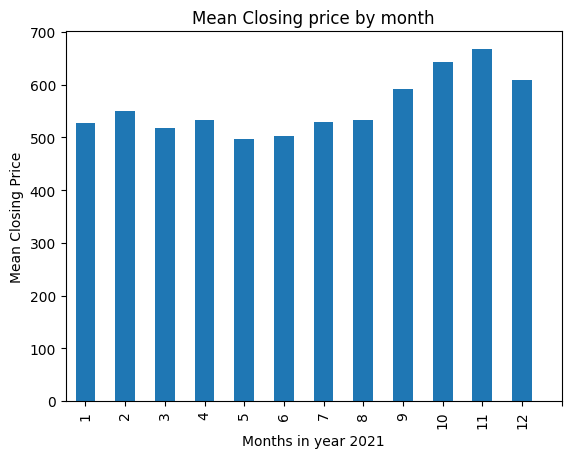

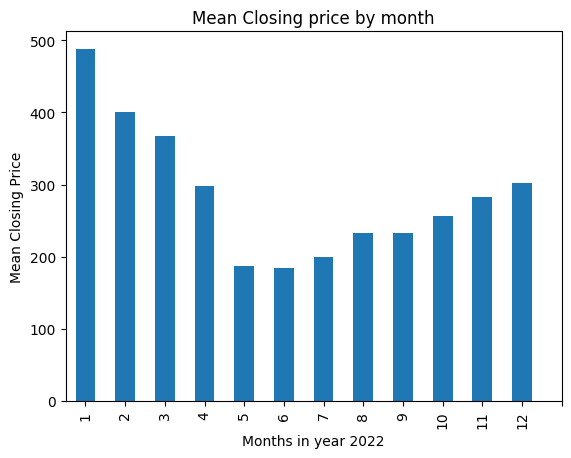

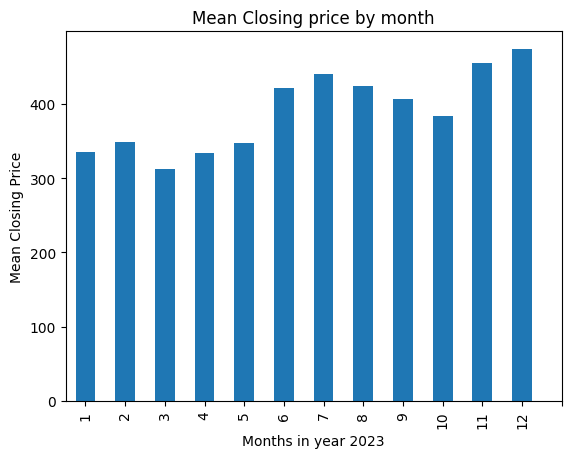

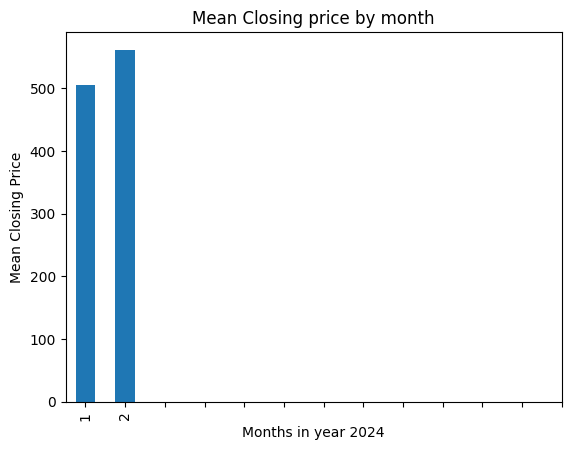

In [ ]:
# Group by year and store in a dictionary
yearly_dfs = {year: group for (year, group) in df.groupby(df['Date'].dt.year)}

# Access each DataFrame for a specific year
for year, yearly_df in yearly_dfs.items():
  monthly_df = yearly_df.groupby(yearly_df['Date'].dt.month)['Close'].mean()
  monthly_df.plot(kind='bar',
                  xlabel=f'Months in year {year}',
                  ylabel='Mean Closing Price',
                  title='Mean Closing price by month')
  plt.xticks(range(0,13))
  plt.show()

In [ ]:
yearly_dfs

{2010:           Date  Open  High   Low  Close  Adj Close    Volume
 0   2010-01-04  7.93  7.96  7.57   7.64       7.64  17239600
 1   2010-01-05  7.65  7.66  7.26   7.36       7.36  23753100
 2   2010-01-06  7.36  7.67  7.20   7.62       7.62  23290400
 3   2010-01-07  7.73  7.76  7.46   7.49       7.49   9955400
 4   2010-01-08  7.50  7.74  7.47   7.61       7.61   8180900
 ..         ...   ...   ...   ...    ...        ...       ...
 247 2010-12-27 25.74 25.83 25.39  25.72      25.72  26189100
 248 2010-12-28 25.59 26.34 25.50  26.24      26.24  27215300
 249 2010-12-29 26.29 26.36 25.74  25.75      25.75  19399100
 250 2010-12-30 25.71 25.76 25.53  25.69      25.69  14743400
 251 2010-12-31 25.58 25.68 25.08  25.10      25.10  21562800
 
 [252 rows x 7 columns],
 2011:           Date  Open  High   Low  Close  Adj Close    Volume
 252 2011-01-03 25.00 25.84 24.79  25.49      25.49  39956000
 253 2011-01-04 25.91 26.41 25.47  25.91      25.91  44065700
 254 2011-01-05 25.88 26.11 25.

<ipython-input-78-41d23c9a68f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


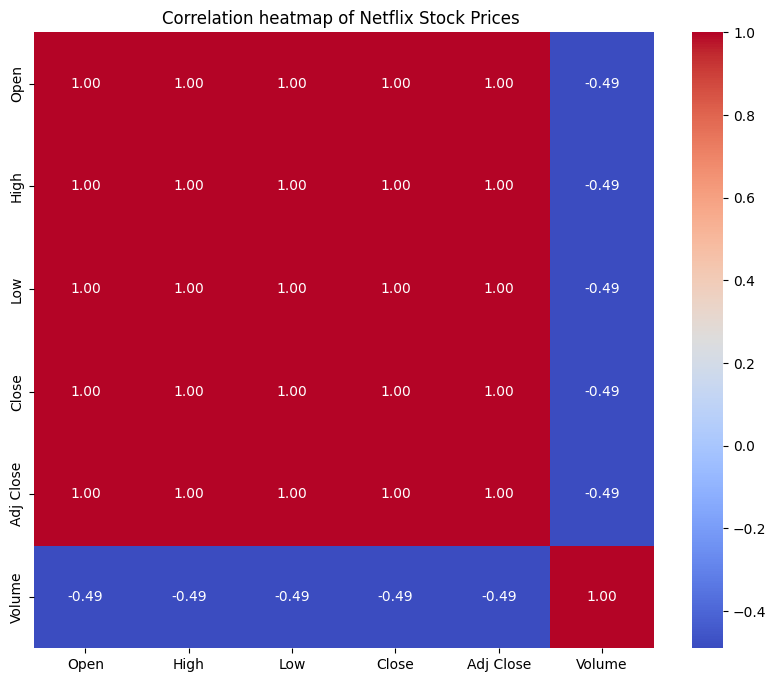

In [ ]:
import seaborn as sns
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heatmap of Netflix Stock Prices ')
plt.show()

In [ ]:
pivot_table=df.pivot_table(index='Date', values=['Open','High','Low','Close','Adj Close'], aggfunc='mean')
print(pivot_table)

            Adj Close  Close   High    Low   Open
Date                                             
2010-01-04       7.64   7.64   7.96   7.57   7.93
2010-01-05       7.36   7.36   7.66   7.26   7.65
2010-01-06       7.62   7.62   7.67   7.20   7.36
2010-01-07       7.49   7.49   7.76   7.46   7.73
2010-01-08       7.61   7.61   7.74   7.47   7.50
...               ...    ...    ...    ...    ...
2024-02-05     562.06 562.06 575.75 557.20 562.47
2024-02-06     555.88 555.88 566.34 554.37 564.12
2024-02-07     559.30 559.30 567.80 554.98 558.16
2024-02-08     558.53 558.53 563.70 555.74 560.55
2024-02-09     561.32 561.32 566.00 558.10 565.00

[3550 rows x 5 columns]


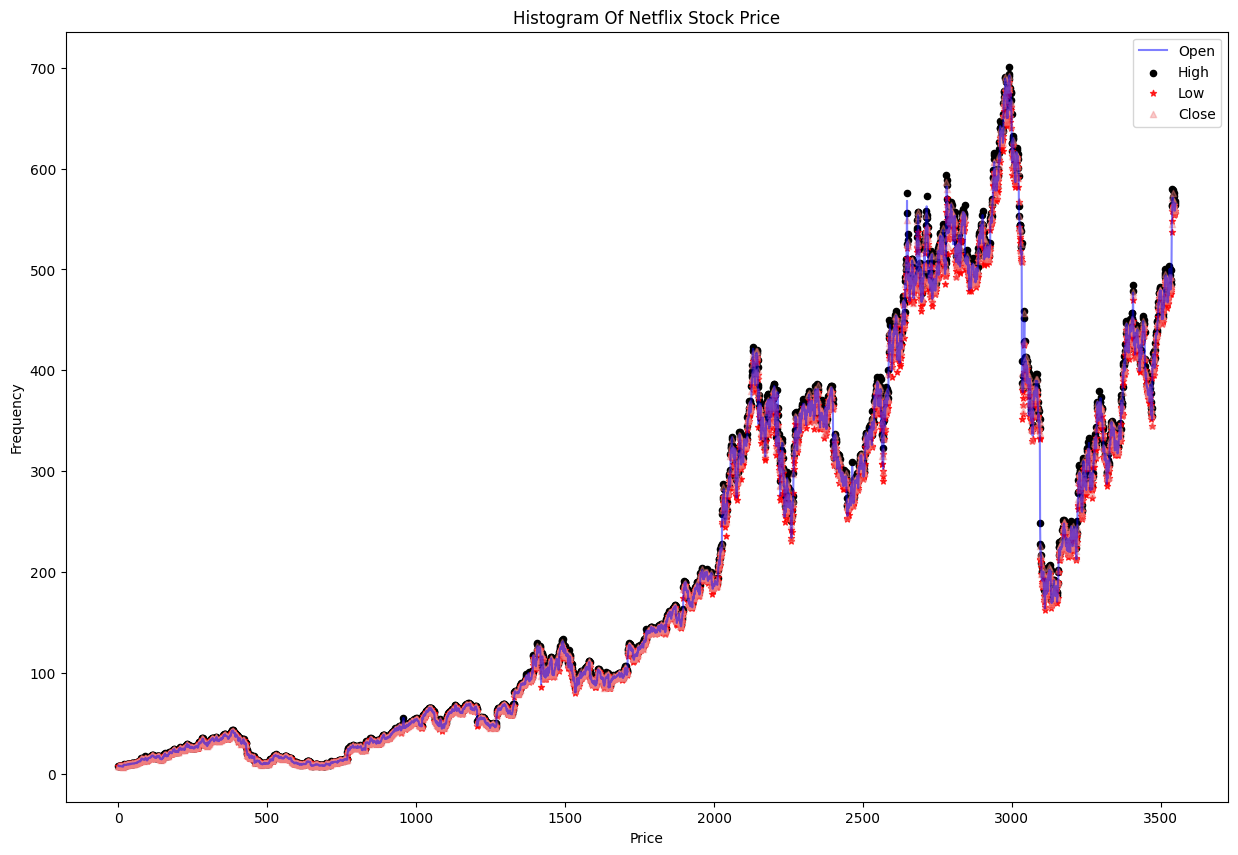

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df.index, df['Open'], color='blue', alpha=0.5, label='Open')
plt.scatter(df.index, df['High'],s=20, color='black', alpha=1, label='High')
plt.scatter(df.index, df['Low'], s=20,marker='*', color='red', alpha=0.8, label='Low')
plt.scatter(df.index, df['Close'], s=20,marker='^', color='lightcoral', alpha=0.4, label='Close')
plt.title('Histogram Of Netflix Stock Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
X= df[['Open','High','Low','Volume']]
y= df['Close']
model=LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)
print('Cofficient : ', model.coef_)
print('Intercept : ', model.intercept_)

Cofficient :  [-5.84159588e-01  7.99276363e-01  7.84941022e-01  1.04795050e-09]
Intercept :  0.026748884720433352


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_squared_error
# import numpy as np

# X = df[['Open', 'High', 'Low', 'Volume']]
# y = df['Close']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Instantiate the Linear Regression model
# model = LinearRegression()

# # Fit the model to the training data
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Calculate R2 score
# r2 = r2_score(y_test, y_pred)
# print('R2 Score:', r2)

# # Calculate Mean Squared Error (MSE)
# mse = mean_squared_error(y_test, y_pred)
# print('Mean Squared Error (MSE):', mse)

# # Calculate Root Mean Squared Error (RMSE)
# rmse = np.sqrt(mse)
# print('Root Mean Squared Error (RMSE):', rmse)

# n = len(X_test)  # number of samples in the test set
# p = X_test.shape[1]  # number of features
# adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
# print('Adjusted R2 Score:', adjusted_r2)

R2 Score: 0.9998077215757951
Mean Squared Error (MSE): 6.239168853394324
Root Mean Squared Error (RMSE): 2.4978328313548777
Adjusted R2 Score: 0.9998066306343811


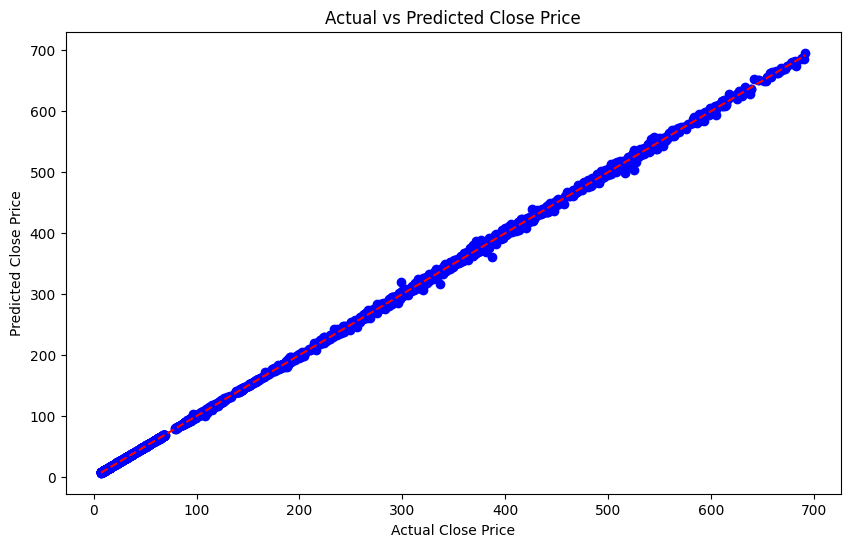

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y,y_pred,color='blue')
plt.plot([y.min(),y.max()],[y.min(),y.max()], color='red', linestyle='--')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.show()

In [ ]:
def predict_price(features):
  predicted_price= np.dot(model.coef_, features) + model.intercept_
  return predicted_price

fect1=np.array([581.91,597.00,577.46,2236397])
fect2=np.array([581.91,593.77,580.32,5214100])
fect3=np.array([567.26,581.25,564.34,5634200])
fect4=np.array([550.80,559.20,549.00,3511500])
outcome= predict_price(fect1)
print(f'Predicted price for 2024-02-16 for Netflix is : {outcome:.02f}')
outcome= predict_price(fect2)
print(f'Predicted price for 2024-02-15 for Netflix is : {outcome:.02f}')
outcome= predict_price(fect3)
print(f'Predicted price for 2024-02-14 for Netflix is : {outcome:.02f}')
outcome= predict_price(fect4)
print(f'Predicted price for 2024-02-13 for Netflix is : {outcome:.02f}')

Predicted price for 2024-02-16 for Netflix is : 590.54
Predicted price for 2024-02-15 for Netflix is : 590.21
Predicted price for 2024-02-14 for Netflix is : 576.22
Predicted price for 2024-02-13 for Netflix is : 556.16


In [ ]:
# Feb 16, 2024 590.03 difference is = 590.54 - 590.03 = +0.51
# Feb 15, 2024 593.46 difference is = 590.21 - 593.46 = -3.25
# Feb 14, 2024 579.33 difference is = 576.22 - 579.33 = -3.11
# Feb 13, 2024 554.52 difference is = 556.16 - 554.52 = +1.64